In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np

# Creating data to view & fit

In [3]:
from sklearn.datasets import make_circles

# Making 1000 Examples

n_samples = 1000

# Create Circles

X,y = make_circles(n_samples, 
                   noise = 0.03, 
                   random_state = 101)

In [4]:
type(make_circles)

function

In [5]:
help(make_circles)

Help on function make_circles in module sklearn.datasets._samples_generator:

make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)
    Make a large circle containing a smaller circle in 2d.
    
    A simple toy dataset to visualize clustering and classification
    algorithms.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or tuple of shape (2,), dtype=int, default=100
        If int, it is the total number of points generated.
        For odd numbers, the inner circle will have one point more than the
        outer circle.
        If two-element tuple, number of points in outer circle and inner
        circle.
    
        .. versionchanged:: 0.23
           Added two-element tuple.
    
    shuffle : bool, default=True
        Whether to shuffle the samples.
    
    noise : float, default=None
        Standard deviation of Gaussian noise added to the data.
    
    random_sta

In [6]:
#from sklearn.datasets import load_boston
#dir(load_boston)
# data = load_boston()
# https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3
#print(data.keys())
#print(data.DESCR)

In [7]:
# Checking the features
X

array([[ 0.67621763,  0.49758361],
       [-0.81272345, -0.54300962],
       [ 0.19260493,  1.0200862 ],
       ...,
       [-0.46351461, -0.8701022 ],
       [ 0.74035651,  0.2232333 ],
       [-0.11747325, -0.80989476]])

In [8]:
# Checking the target
y[:20]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [9]:
# Import pandas
import pandas as pd
# Read the DataFrame, first using the feature data
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "lable":y})
circles

,X0,X1,lable
0,0.676218,0.497584,1
1,-0.812723,-0.543010,0
2,0.192605,1.020086,0
3,-0.320621,-0.691720,1
4,-0.779619,0.645467,0
...,...,...,...
995,0.423747,0.586634,1
996,-0.347300,-0.692031,1
997,-0.463515,-0.870102,0
998,0.740357,0.223233,1


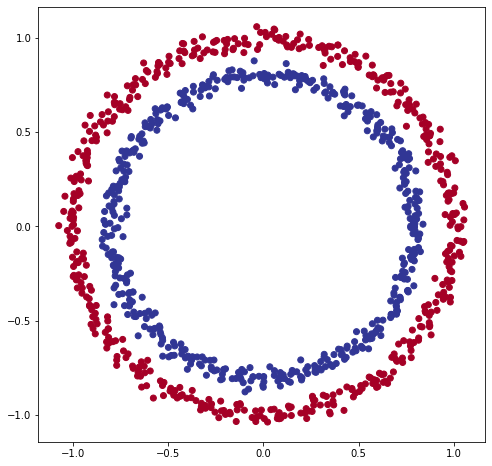

In [10]:
# Visualising the data
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.scatter(X[:,0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

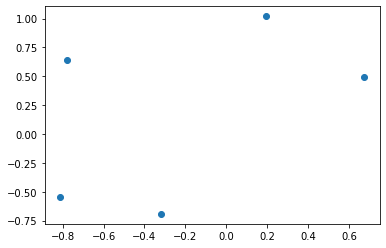

In [11]:
plt.scatter(X[:5,0], X[:5, 1])

# Input & Output Shapes

In [12]:
# Checking the shapes of features & labels
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# Sample size
len(X), len(y)

(1000, 1000)

In [14]:
# Looking at the examples
X[5], y[5]

(array([0.22219438, 0.78129927]), 1)

In [15]:
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [29]:
# Building the model
model = tf.keras.Sequential([
   # tf.keras.Input(shape=(None, 1000,2)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [30]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer =tf.keras.optimizers.Adam(learning_rate = 0.005),
              metrics = ['accuracy'])

In [31]:
# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [32]:
# history = model.fit(X_train, y_train, epochs = 50, callbacks = [lr_scheduler])

history = model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5288
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5925
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6463
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7713
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7875
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.8562
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.8913
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.9000
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.9650
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.9762
Epoch 11/50
25/25 [

In [33]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000


[0.009182979352772236, 1.0]

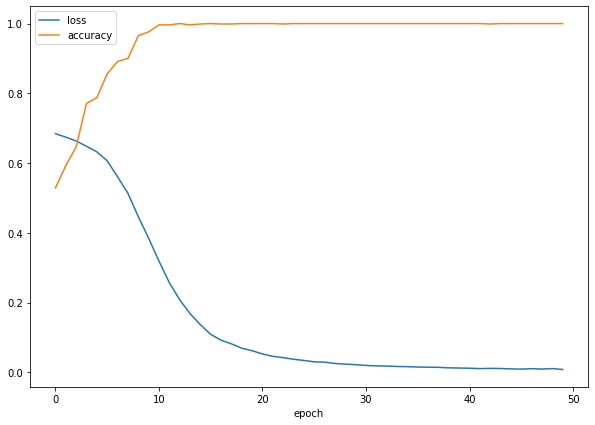

In [34]:

pd.DataFrame(history.history).plot(figsize = (10,7), xlabel = 'epoch')

In [35]:
# Learning rate versus loss
# Below are the different values of learning rates
lrs = 1e-4 * (10**(tf.range(50)/20))
lrs

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.0001    , 0.0001122 , 0.00012589, 0.00014125, 0.00015849,
       0.00017783, 0.00019953, 0.00022387, 0.00025119, 0.00028184,
       0.00031623, 0.00035481, 0.00039811, 0.00044668, 0.00050119,
       0.00056234, 0.00063096, 0.00070795, 0.00079433, 0.00089125,
       0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383])>

Text(0.5, 1.0, 'Learning rate vs. loss')

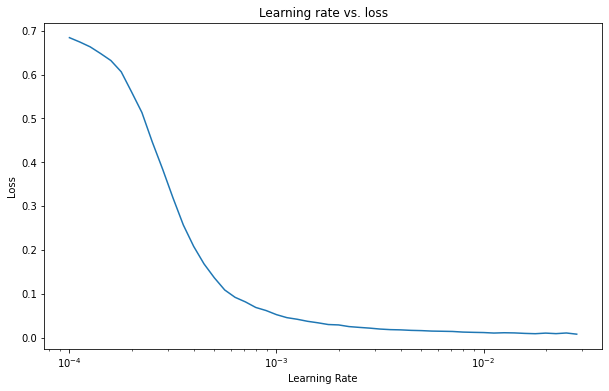

In [36]:
lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize=(10,6))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [37]:
# model.get_weights()

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [39]:
X_train.shape

(800, 2)

In [40]:


def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


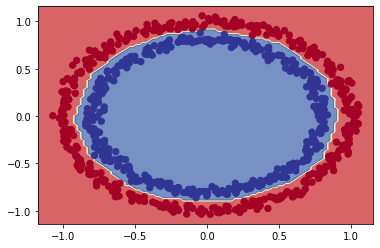

In [41]:
# Check out the predictions our model is making
plot_decision_boundary(model, X_train, y_train)

doing binary classifcation...


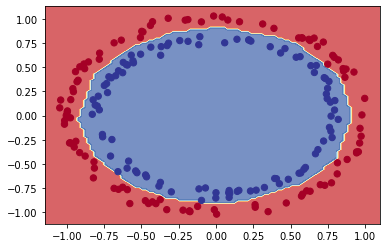

In [42]:
# Check out the predictions our model is making
plot_decision_boundary(model, X_test, y_test)

In [43]:
# COnverting history object to DataFrame
# history.history
df = pd.DataFrame(history.history)
df

,loss,accuracy
0,0.684199,0.52875
1,0.674311,0.59250
2,0.663294,0.64625
3,0.648150,0.77125
4,0.632082,0.78750
5,0.606379,0.85625
6,0.560480,0.89125
7,0.513465,0.90000
8,0.446406,0.96500
9,0.384364,0.97625


Text(0.5, 1.0, 'Model Loss Curve')

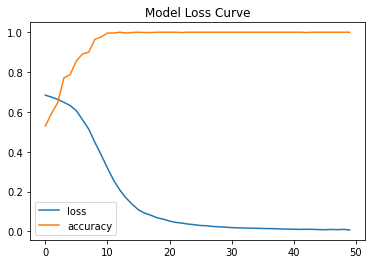

In [44]:
# Plooting the loss curve
df.plot()
plt.title("Model Loss Curve")

# Confusion Matrix 

In [45]:
# Creating Confusion Matrix
from sklearn.metrics import confusion_matrix

In [46]:
# Making Predicitons
y_preds = model.predict(X_test)

In [50]:
# Converting our probabilities into binary
y_preds = tf.round(y_preds)

In [53]:
# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[104,   0],
       [  0,  96]])

In [52]:
# y_preds

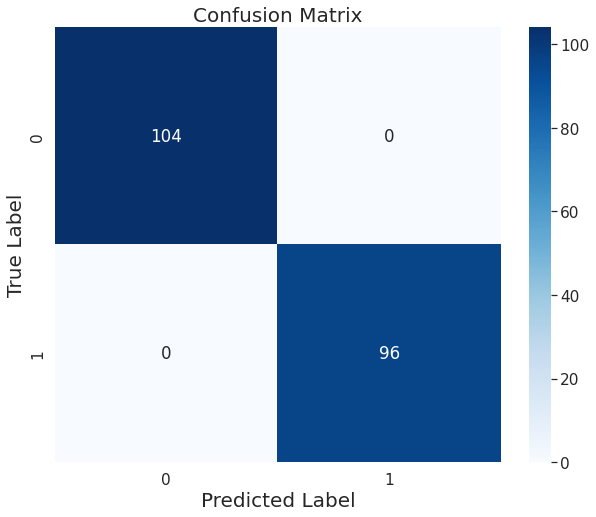

In [67]:
import seaborn as sns
sns.set(font_scale=1.4)
plt.figure(figsize = (10,8))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.set(
    title = 'Confusion Matrix',
    xlabel = 'Predicted Label',
    ylabel = 'True Label'
)

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)